In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
from time import time

In [131]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [132]:
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [133]:
standard_scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(standard_scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(standard_scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(standard_scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [134]:
backHistory = [30, 45, 60, 90, 180, 240] 
return_period = 2
BH1, BH2, BH3 = backHistory[1], backHistory[3], backHistory[4]
Y = Base. shift(-return_period)
X4_BH1 = Base.diff( BH1).shift( - BH1)
X4_BH2 = Base.diff( BH2).shift( - BH2)
X4_BH3 = Base.diff( BH3).shift( - BH3)

X4 = pd.concat([X4_BH1, X4_BH2, X4_BH3], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

### Data Preparation


In [135]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [136]:
dataset.dropna(inplace=True)
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,72.465797,-1.092052,-0.336185,0.004572,0.199625,-1.228587,-1.421087,-1.220836,0.115459,0.092629,-0.257415
2017-10-11,72.813438,-1.063671,-0.397339,0.028951,0.191501,-1.221866,-1.410762,-1.247359,0.073326,0.040675,-0.261341
2017-10-12,72.963814,-1.063671,-0.438342,0.032608,0.133005,-1.228164,-1.418560,-1.240440,0.151443,0.023344,-0.242541
2017-10-13,72.907402,-1.060141,-0.433476,-0.021025,0.344241,-1.224891,-1.411048,-1.275035,0.106707,0.098425,-0.277632
2017-10-16,72.926208,-1.057788,-0.452241,-0.047842,0.313368,-1.218359,-1.390198,-1.240440,0.068850,0.144366,-0.263006
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,308.186462,1.834800,1.219371,0.320276,0.984450,1.950431,1.871243,-0.351346,-1.355440,-2.824802,-3.192815
2022-01-13,300.685425,1.744378,1.323377,0.237389,1.026697,1.852067,1.828021,-0.041144,-0.670483,-2.326909,-2.602908
2022-01-14,301.361023,1.772791,1.274486,0.216667,0.938953,1.857649,1.778657,-0.170299,-0.697994,-2.426496,-2.525774
2022-01-18,299.642273,1.662049,1.161591,0.303211,0.805711,1.732371,1.645752,0.244842,-0.531176,-1.988282,-2.308379


In [137]:
Y = pd.DataFrame()
Y = dataset.iloc[:, 0:1]
X = dataset.drop(dataset.columns[0],axis = 1)
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,-1.092052,-0.336185,0.004572,0.199625,-1.228587,-1.421087,-1.220836,0.115459,0.092629,-0.257415
2017-10-11,-1.063671,-0.397339,0.028951,0.191501,-1.221866,-1.410762,-1.247359,0.073326,0.040675,-0.261341
2017-10-12,-1.063671,-0.438342,0.032608,0.133005,-1.228164,-1.418560,-1.240440,0.151443,0.023344,-0.242541
2017-10-13,-1.060141,-0.433476,-0.021025,0.344241,-1.224891,-1.411048,-1.275035,0.106707,0.098425,-0.277632
2017-10-16,-1.057788,-0.452241,-0.047842,0.313368,-1.218359,-1.390198,-1.240440,0.068850,0.144366,-0.263006
...,...,...,...,...,...,...,...,...,...,...
2022-01-12,1.834800,1.219371,0.320276,0.984450,1.950431,1.871243,-0.351346,-1.355440,-2.824802,-3.192815
2022-01-13,1.744378,1.323377,0.237389,1.026697,1.852067,1.828021,-0.041144,-0.670483,-2.326909,-2.602908
2022-01-14,1.772791,1.274486,0.216667,0.938953,1.857649,1.778657,-0.170299,-0.697994,-2.426496,-2.525774
2022-01-18,1.662049,1.161591,0.303211,0.805711,1.732371,1.645752,0.244842,-0.531176,-1.988282,-2.308379


In [138]:
dataCorr = X.corr()

<AxesSubplot:>

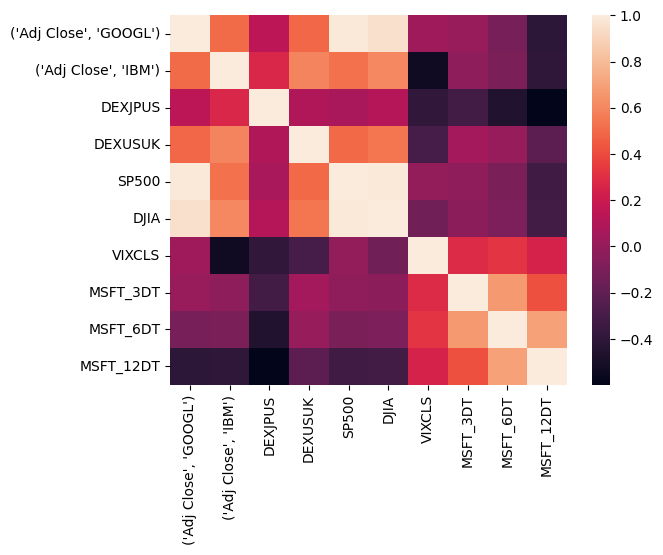

In [139]:
sns.heatmap(dataCorr)

In [140]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.502443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.142627,0.266252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.492364,0.592318,0.088711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.983325,0.522864,0.065211,0.495873,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.954155,0.603744,0.110699,0.539900,0.983523,0.000000,0.000000,0.000000,0.000000,0.0
6,0.036919,-0.530828,-0.391689,-0.302625,-0.008897,-0.139544,0.000000,0.000000,0.000000,0.0
7,0.006979,-0.029842,-0.311959,0.050360,-0.023139,-0.039864,0.282019,0.000000,0.000000,0.0
8,-0.115311,-0.093508,-0.461014,0.003517,-0.095613,-0.087408,0.323937,0.664654,0.000000,0.0
9,-0.407241,-0.402174,-0.598933,-0.211758,-0.325067,-0.314108,0.249180,0.413753,0.696979,0.0


In [141]:
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X.drop(to_drop, inplace=True, axis=1)
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,-0.336185,0.004572,0.199625,-1.421087,-1.220836,0.115459,0.092629,-0.257415
2017-10-11,-0.397339,0.028951,0.191501,-1.410762,-1.247359,0.073326,0.040675,-0.261341
2017-10-12,-0.438342,0.032608,0.133005,-1.418560,-1.240440,0.151443,0.023344,-0.242541
2017-10-13,-0.433476,-0.021025,0.344241,-1.411048,-1.275035,0.106707,0.098425,-0.277632
2017-10-16,-0.452241,-0.047842,0.313368,-1.390198,-1.240440,0.068850,0.144366,-0.263006
...,...,...,...,...,...,...,...,...
2022-01-12,1.219371,0.320276,0.984450,1.871243,-0.351346,-1.355440,-2.824802,-3.192815
2022-01-13,1.323377,0.237389,1.026697,1.828021,-0.041144,-0.670483,-2.326909,-2.602908
2022-01-14,1.274486,0.216667,0.938953,1.778657,-0.170299,-0.697994,-2.426496,-2.525774
2022-01-18,1.161591,0.303211,0.805711,1.645752,0.244842,-0.531176,-1.988282,-2.308379


In [142]:
seed = 4
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=seed)

### Create Model List

In [143]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [144]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [145]:
kernel = ['linear', 'rbf', 'poly']
C_list = [10, 100]
ep_list = [0.1, 1, 5]
gamma = [0.01, 0.1]
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [146]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid = GridSearchCV( estimator=model, n_jobs = 1,
                        verbose = 10,
                        cv = 4,
                        scoring = 'neg_mean_squared_error',
                        param_grid = params )
    grid_result = grid.fit(X_train, Y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/4; 1/4] END fit_intercept=True, normalize=True;, score=-225.603 total time=   0.0s
[CV 2/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/4; 1/4] END fit_intercept=True, normalize=True;, score=-236.324 total time=   0.0s
[CV 3/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/4; 1/4] END fit_intercept=True, normalize=True;, score=-226.015 total time=   0.0s
[CV 4/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/4; 1/4] END fit_intercept=True, normalize=True;, score=-245.160 total time=   0.0s
[CV 1/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/4; 2/4] END fit_intercept=True, normalize=False;, score=-225.603 total time=   0.0s
[CV 2/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/4;

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Progra

[CV 1/4; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-250.917 total time=   0.0s
[CV 2/4; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 2/4; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-262.234 total time=   0.0s
[CV 3/4; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 3/4; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-244.968 total time=   0.0s
[CV 4/4; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-256.492 total time=   0.0s
[CV 1/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 1/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-819.708 total time=   0.0s
[CV 2/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-762.411 total time=   0.0s
[CV 3/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 3/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-629.917 total time=   0.0s
[CV 4/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 4/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-658.098 total time=   0.0s
[CV 1/4; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/4; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5400.528 total time=   0.0s
[CV 3/4; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 3/4; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6003.208 total time=   0.0s
[CV 4/4; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 4/4; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5599.714 total time=   0.0s
[CV 1/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 1/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-250.917 total time=   0.0s
[CV 2/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 2/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-262.234 total time=   0.0s
[CV 3/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 3/4; 4/72] END C=10, degree=2, epsilon=0.1, ga

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-134.216 total time=   0.0s
[CV 4/4; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 4/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-129.861 total time=   0.0s
[CV 1/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 1/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-780.204 total time=   0.0s
[CV 2/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 2/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-774.859 total time=   0.0s
[CV 3/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 3/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-924.041 total time=   0.0s
[CV 4/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 4/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-815.116 total time=   0.0s
[CV 2/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 2/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-771.157 total time=   0.0s
[CV 3/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 3/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-622.564 total time=   0.0s
[CV 4/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 4/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-656.389 total time=   0.0s
[CV 1/4; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 1/4; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-5938.703 total time=   0.0s
[CV 2/4; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 2/4; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=pol

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-259.573 total time=   0.0s
[CV 3/4; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 3/4; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-241.068 total time=   0.0s
[CV 4/4; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 4/4; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-256.751 total time=   0.0s
[CV 1/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-155.823 total time=   0.0s
[CV 2/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-155.198 total time=   0.0s
[CV 3/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 3/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-780.745 total time=   0.0s
[CV 3/4; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 3/4; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-928.198 total time=   0.0s
[CV 4/4; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 4/4; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-1066.630 total time=   0.0s
[CV 1/4; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/4; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-239.007 total time=   0.0s
[CV 2/4; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/4; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-256.432 total time=   0.0s
[CV 3/4; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 3/4; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01,

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-139.296 total time=   0.0s
[CV 1/4; 18/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly.........
[CV 1/4; 18/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-804.990 total time=   0.0s
[CV 2/4; 18/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly.........
[CV 2/4; 18/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-770.344 total time=   0.0s
[CV 3/4; 18/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly.........
[CV 3/4; 18/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-886.272 total time=   0.0s
[CV 4/4; 18/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly.........
[CV 4/4; 18/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-1031.733 total time=   0.0s
[CV 1/4; 19/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 1/4; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kern

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6360.318 total time=   0.0s
[CV 2/4; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 2/4; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5814.246 total time=   0.0s
[CV 3/4; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 3/4; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6339.506 total time=   0.0s
[CV 4/4; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 4/4; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5897.611 total time=   0.0s
[CV 1/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 1/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-250.917 total time=   0.0s
[CV 2/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-262.234 total time=   0.0s
[CV 3/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 3/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-244.968 total time=   0.0s
[CV 4/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 4/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-256.492 total time=   0.0s
[CV 1/4; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-156.240 total time=   0.0s
[CV 2/4; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 2/4; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-154.192 total time=   0.0s
[CV 3/4; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 3/4; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-134.216 total time=   0.0s
[CV 4/4; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 4/4; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-129.861 total time=   0.0s
[CV 1/4; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1034.670 total time=   0.0s
[CV 2/4; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 2/4; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1010.578 total time=   0.0s
[CV 3/4; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 3/4; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1026.846 total time=   0.0s
[CV 4/4; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1301.754 total time=   0.0s
[CV 1/4; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 1/4; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-249.549 total time=   0.0s
[CV 2/4; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 2/4; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-259.573 total time=   0.0s
[CV 3/4; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-241.068 total time=   0.0s
[CV 4/4; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 4/4; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-256.751 total time=   0.0s
[CV 1/4; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 1/4; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-815.116 total time=   0.0s
[CV 2/4; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 2/4; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-771.157 total time=   0.0s
[CV 3/4; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-622.564 total time=   0.0s
[CV 4/4; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 4/4; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-656.389 total time=   0.0s
[CV 1/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 1/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6354.064 total time=   0.0s
[CV 2/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 2/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5794.120 total time=   0.0s
[CV 3/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 3/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6368.941 total time=   0.0s
[CV 4/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5891.037 total time=   0.0s
[CV 1/4; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/4; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-249.549 total time=   0.0s
[CV 2/4; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/4; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-259.573 total time=   0.0s
[CV 3/4; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-241.068 total time=   0.0s
[CV 4/4; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 4/4; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-256.751 total time=   0.0s
[CV 1/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-155.823 total time=   0.0s
[CV 2/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-155.198 total time=   0.0s
[CV 3/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-135.803 total time=   0.0s
[CV 4/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 4/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-130.138 total time=   0.0s
[CV 1/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1035.959 total time=   0.0s
[CV 2/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1013.959 total time=   0.0s
[CV 3/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 3/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1029.472 total time=   0.0s
[CV 4/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 4/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1297.394 total time=   0.0s
[CV 1/4; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/4; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-239.007 total time=   0.0s
[CV 2/4; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-256.432 total time=   0.0s
[CV 3/4; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 3/4; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-236.345 total time=   0.0s
[CV 4/4; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 4/4; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-251.636 total time=   0.0s
[CV 1/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-817.221 total time=   0.0s
[CV 2/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-784.833 total time=   0.0s
[CV 3/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 3/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-636.217 total time=   0.0s
[CV 4/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 4/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-663.530 total time=   0.0s
[CV 1/4; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/4; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-6290.597 total time=   0.0s
[CV 2/4; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........
[CV 2/4; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-5832.142 total time=   0.0s
[CV 3/4; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-6267.297 total time=   0.0s
[CV 4/4; 33/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly........
[CV 4/4; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-5861.964 total time=   0.0s
[CV 1/4; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 1/4; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-239.007 total time=   0.0s
[CV 2/4; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 2/4; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-256.432 total time=   0.0s
[CV 3/4; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-236.345 total time=   0.0s
[CV 4/4; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 4/4; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-251.636 total time=   0.0s
[CV 1/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-166.171 total time=   0.0s
[CV 2/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-162.231 total time=   0.0s
[CV 3/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-139.850 total time=   0.0s
[CV 4/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 4/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-139.296 total time=   0.0s
[CV 1/4; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 1/4; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-1018.777 total time=   0.0s
[CV 2/4; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 2/4; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-1033.989 total time=   0.0s
[CV 3/4; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-1020.618 total time=   0.0s
[CV 4/4; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 4/4; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-1315.948 total time=   0.0s
[CV 1/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


[CV 1/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-247.278 total time=   0.1s
[CV 2/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-261.521 total time=   0.2s
[CV 3/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-245.716 total time=   0.2s
[CV 4/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 4/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-255.023 total time=   0.0s
[CV 1/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-195.548 total time=   0.0s
[CV 2/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-202.642 total time=   0.0s
[CV 3/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-173.360 total time=   0.0s
[CV 4/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 4/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-197.071 total time=   0.0s
[CV 1/4; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/4; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-3121.173 total time=   0.0s
[CV 2/4; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/4; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-2894.906 total time=   0.0s
[CV 3/4; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 3/4; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-3235.745 total time=   0.0s
[CV 4/4; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 4/4; 39/72] END C=100, degree=2, epsilon

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-247.278 total time=   0.0s
[CV 2/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-261.521 total time=   0.0s
[CV 3/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 3/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-245.716 total time=   0.0s
[CV 4/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-255.023 total time=   0.0s
[CV 1/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.353 total time=   0.0s
[CV 2/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.538 total time=   0.0s
[CV 3/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 3/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-55.750 total time=   0.0s
[CV 4/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 4/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.342 total time=   0.0s
[CV 1/4; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-463.688 total time=   0.0s
[CV 2/4; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/4; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-463.854 total time=   0.0s
[CV 3/4; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 3/4; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-423.294 total time=   0.0s
[CV 4/4; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 4/4; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-614.822 total time=   0.0s
[CV 1/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-250.644 total time=   0.0s
[CV 2/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-258.930 total time=   0.0s
[CV 3/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 3/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-241.466 total time=   0.0s
[CV 4/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-256.811 total time=   0.2s
[CV 1/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-193.607 total time=   0.0s
[CV 2/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-202.197 total time=   0.0s
[CV 3/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 3/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-168.849 total time=   0.0s
[CV 4/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 4/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-196.165 total time=   0.0s
[CV 1/4; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/4; 45/72] END C=100, degree=2, epsilon=1, gamma=0.0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-2889.802 total time=   0.0s
[CV 3/4; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 3/4; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-3224.818 total time=   0.0s
[CV 4/4; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 4/4; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-3409.763 total time=   0.0s
[CV 1/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-250.644 total time=   0.0s
[CV 2/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-258.930 total time=   0.0s
[CV 3/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 3/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-241.466 total time=   0.0s
[CV 4/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-256.811 total time=   0.2s
[CV 1/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-59.133 total time=   0.0s
[CV 2/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-58.645 total time=   0.0s
[CV 3/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 3/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-52.476 total time=   0.0s
[CV 4/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 4/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-62.513 total time=   0.0s
[CV 1/4; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/4; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-462.109 total time=   0.0s
[CV 3/4; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 3/4; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-437.783 total time=   0.0s
[CV 4/4; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 4/4; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-614.100 total time=   0.0s
[CV 1/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-238.171 total time=   0.0s
[CV 2/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-255.391 total time=   0.0s
[CV 3/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-234.828 total time=   0.0s
[CV 4/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 4/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-252.058 total time=   0.0s
[CV 1/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-190.720 total time=   0.0s
[CV 2/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-202.587 total time=   0.0s
[CV 3/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-164.181 total time=   0.0s
[CV 4/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 4/4; 50/72] END C=100, degree=2, epsilon=5, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-2863.980 total time=   0.0s
[CV 3/4; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 3/4; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3159.009 total time=   0.0s
[CV 4/4; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 4/4; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3330.326 total time=   0.0s
[CV 1/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 1/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-238.171 total time=   0.0s
[CV 2/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-255.391 total time=   0.0s
[CV 3/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-234.828 total time=   0.0s
[CV 4/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 4/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-252.058 total time=   0.0s
[CV 1/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.401 total time=   0.0s
[CV 2/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.330 total time=   0.0s
[CV 3/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 3/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-47.218 total time=   0.0s
[CV 4/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 4/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-392.882 total time=   0.0s
[CV 4/4; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 4/4; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-593.757 total time=   0.0s
[CV 1/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 1/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-247.278 total time=   0.0s
[CV 2/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-261.521 total time=   0.0s
[CV 3/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-245.716 total time=   0.0s
[CV 4/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 4/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-255.023 total time=   0.0s
[CV 1/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-195.548 total time=   0.0s
[CV 2/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-202.642 total time=   0.0s
[CV 3/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 3/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-173.360 total time=   0.0s
[CV 4/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-197.071 total time=   0.0s
[CV 1/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5681.934 total time=   0.0s
[CV 2/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5202.634 total time=   0.0s
[CV 3/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 3/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5701.217 total time=   0.0s
[CV 4/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 4/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5476.674 total time=   0.0s
[CV 1/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/4; 58/72] END C=100, degree=3, epsil

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-261.521 total time=   0.0s
[CV 3/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 3/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-245.716 total time=   0.0s
[CV 4/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 4/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-255.023 total time=   0.0s
[CV 1/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.353 total time=   0.0s
[CV 2/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.538 total time=   0.0s
[CV 3/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 3/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-55.750 total time=   0.0s
[CV 4/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 4/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.342 total time=   0.0s
[CV 1/4; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-428.307 total time=   0.0s
[CV 2/4; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-469.133 total time=   0.0s
[CV 3/4; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 3/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-455.154 total time=   0.0s
[CV 4/4; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 4/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-501.279 total time=   0.0s
[CV 1/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-250.644 total time=   0.0s
[CV 2/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-258.930 total time=   0.3s
[CV 3/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-241.466 total time=   0.1s
[CV 4/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-256.811 total time=   0.5s
[CV 1/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-193.607 total time=   0.0s
[CV 2/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-202.197 total time=   0.0s
[CV 3/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 3/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-168.849 total time=   0.0s
[CV 4/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 4/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-196.165 total time=   0.0s
[CV 1/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5467.931 total time=   0.0s
[CV 1/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-250.644 total time=   0.1s
[CV 2/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 2/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-258.930 total time=   0.1s
[CV 3/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-241.466 total time=   0.1s
[CV 4/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-256.811 total time=   0.4s
[CV 1/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-59.133 total time=   0.0s
[CV 2/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-58.645 total time=   0.0s
[CV 3/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-52.476 total time=   0.0s
[CV 4/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 4/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-62.513 total time=   0.0s
[CV 1/4; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-429.419 total time=   0.0s
[CV 2/4; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-467.276 total time=   0.0s
[CV 3/4; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 3/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-465.221 total time=   0.0s
[CV 4/4; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-512.626 total time=   0.0s
[CV 1/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-238.171 total time=   0.3s
[CV 2/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-255.391 total time=   0.0s
[CV 3/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 3/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-234.828 total time=   0.0s
[CV 4/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-252.058 total time=   0.0s
[CV 1/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-190.720 total time=   0.0s
[CV 2/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-202.587 total time=   0.0s
[CV 3/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-164.181 total time=   0.0s
[CV 4/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 4/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-196.458 total time=   0.0s
[CV 1/4; 69/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/4; 69/72] END C=100, degree=3, epsilon=5, gamma=0.0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-238.171 total time=   0.0s
[CV 2/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-255.391 total time=   0.0s
[CV 3/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 3/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-234.828 total time=   0.0s
[CV 4/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 4/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-252.058 total time=   0.0s
[CV 1/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.401 total time=   0.0s
[CV 2/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.330 total time=   0.0s
[CV 3/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 3/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-47.218 total time=   0.0s
[CV 4/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 4/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-62.985 total time=   0.0s
[CV 1/4; 72/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/4; 72/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-434.200 total time=   0.0s
[CV 2/4; 72/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/4; 72/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=po

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

In [147]:
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 100, 'degree': 2, 'epsilon': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  -56.73331397086722


In [148]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
data_linear = []
data_rbf = []
data_poly = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    if param['kernel'] == 'linear':
        data_linear.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'rbf':
        data_rbf.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'poly':
        data_poly.append({'means': mean, 'stds': stdev})

-253.652519 (6.415012) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-717.533447 (76.913982) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-5741.060712 (251.468172) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-253.652519 (6.415012) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-143.627207 (11.712912) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-886.077335 (119.485184) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-251.735209 (7.161892) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-716.306607 (79.293366) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-5731.206316 (233.083236) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-251.735209 (7.161892) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'kerne

<AxesSubplot:>

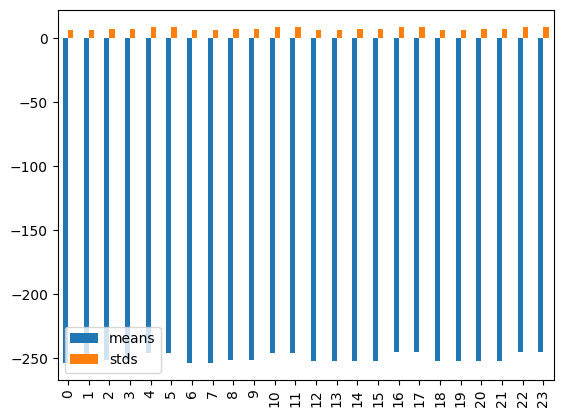

In [149]:
df_linear = pd.DataFrame(data=data_linear)
df_linear.plot.bar()

<AxesSubplot:>

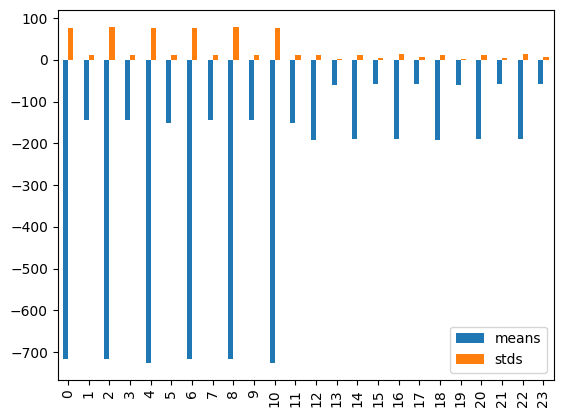

In [150]:
df_rbf = pd.DataFrame(data=data_rbf)
df_rbf.plot.bar()

<AxesSubplot:>

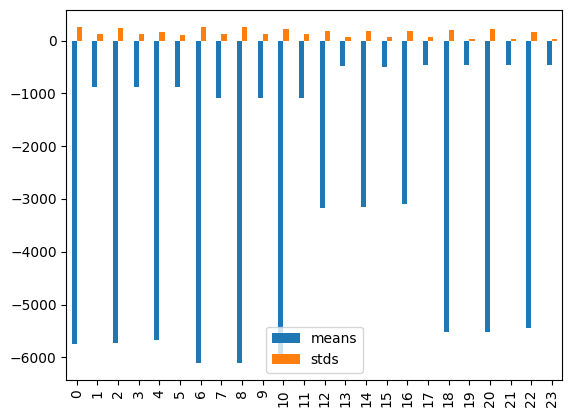

In [151]:
df_poly = pd.DataFrame(data=data_poly)
df_poly.plot.bar()

In [152]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [153]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [154]:
kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.1, 150, 5, dtype = float))
ep_list = list(np.linspace(0.1, 1, 5, dtype = float))
gamma = list(np.linspace(0.01, 0.1, 5, dtype = float))
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [155]:
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

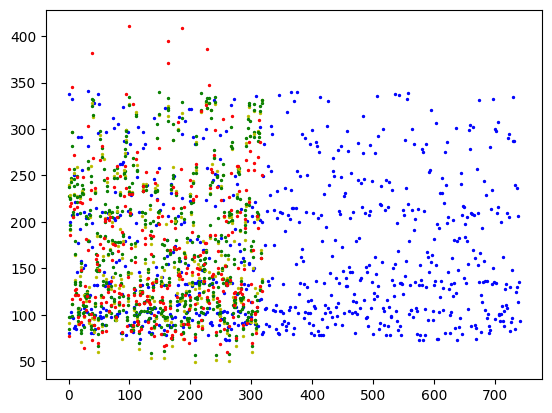

In [156]:
plt.scatter(np.arange(len(Y_train)),Y_train, edgecolors='b', s=2)
plt.scatter(np.arange(len(Y_test)),Y_test, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear, edgecolors='y', s=2)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='r', s=2)
plt.show()

In [157]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR
    grid_rand = RandomizedSearchCV( estimator=model, n_jobs = 1, 
                                    verbose = 10,
                                    cv = 4,
                                    scoring = 'neg_mean_squared_error',
                                    param_distributions = params )
    grid_rand_result = grid_rand.fit(X_train, Y_train)

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Pytho

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/4; 1/4] END fit_intercept=True, normalize=True;, score=-225.603 total time=   0.0s
[CV 2/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/4; 1/4] END fit_intercept=True, normalize=True;, score=-236.324 total time=   0.0s
[CV 3/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/4; 1/4] END fit_intercept=True, normalize=True;, score=-226.015 total time=   0.0s
[CV 4/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/4; 1/4] END fit_intercept=True, normalize=True;, score=-245.160 total time=   0.0s
[CV 1/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/4; 2/4] END fit_intercept=True, normalize=False;, score=-225.603 total time=   0.0s
[CV 2/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/4;

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 1/10] END C=0.1, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-5287.107 total time=   0.0s
[CV 1/4; 2/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 1/4; 2/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-62.772 total time=   0.0s
[CV 2/4; 2/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 2/4; 2/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-65.505 total time=   0.0s
[CV 3/4; 2/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 3/4; 2/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-59.447 total time=   0.0s
[CV 4/4; 2/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf......
[CV 4/4; 2/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-67.370 total time=   0.0s
[CV 1/4; 3/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.01, kernel=poly.....
[CV 1/4; 3/10] END C=0.1, degree=2, epsilon=0.55, gamma

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 5/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.1, kernel=rbf;, score=-63.146 total time=   0.0s
[CV 3/4; 5/10] START C=75.05, degree=3, epsilon=0.775, gamma=0.1, kernel=rbf....
[CV 3/4; 5/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.1, kernel=rbf;, score=-58.947 total time=   0.0s
[CV 4/4; 5/10] START C=75.05, degree=3, epsilon=0.775, gamma=0.1, kernel=rbf....
[CV 4/4; 5/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.1, kernel=rbf;, score=-66.484 total time=   0.0s
[CV 1/4; 6/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf.....
[CV 1/4; 6/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-213.911 total time=   0.0s
[CV 2/4; 6/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf.....
[CV 2/4; 6/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-220.675 total time=   0.0s
[CV 3/4; 6/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf.....
[CV 3/4; 6/10] END C=75.05, degree=2, epsilon

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 7/10] END C=112.525, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-247.282 total time=   0.0s
[CV 2/4; 7/10] START C=112.525, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear
[CV 2/4; 7/10] END C=112.525, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-261.724 total time=   0.0s
[CV 3/4; 7/10] START C=112.525, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 7/10] END C=112.525, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-245.722 total time=   0.0s
[CV 4/4; 7/10] START C=112.525, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear
[CV 4/4; 7/10] END C=112.525, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-255.024 total time=   0.0s
[CV 1/4; 8/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear.
[CV 1/4; 8/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-1922.723 total time=   0.0s
[CV 2/4; 8/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear.
[CV 2/4; 8/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-1839.322 total time=   0.0s
[CV 3/4; 8/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear.
[CV 3/4; 8/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-1624.709 total time=   0.0s
[CV 4/4; 8/10] START C=0.1, degree=2, epsilon=0.55, gamm

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

In [158]:
print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.775, 'degree': 3, 'C': 75.05}
Best score:  -62.72976961238959


In [159]:
means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']
data_linear = []
data_rbf = []
data_poly = []
all_data = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    all_data.append({'means': mean, 'stds': stdev})
    if param['kernel'] == 'linear':
        data_linear.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'rbf':
        data_rbf.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'poly':
        data_poly.append({'means': mean, 'stds': stdev})

-5499.842270 (221.397879) with: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 0.1}
-63.773590 (2.985373) with: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 75.05}
-6177.600867 (257.300298) with: {'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.55, 'degree': 2, 'C': 0.1}
-133.933742 (10.602569) with: {'kernel': 'rbf', 'gamma': 0.0325, 'epsilon': 1.0, 'degree': 2, 'C': 37.575}
-62.729770 (2.679818) with: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.775, 'degree': 3, 'C': 75.05}
-208.272725 (13.126560) with: {'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.1, 'degree': 2, 'C': 75.05}
-252.438164 (6.415026) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.1, 'degree': 2, 'C': 112.525}
-1718.963066 (171.556651) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.55, 'degree': 2, 'C': 0.1}
-1720.013047 (168.763874) with: {'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.325, 'degree': 2, 'C': 0.1}
-519.277136 (35.314338) with: {'ker

<AxesSubplot:>

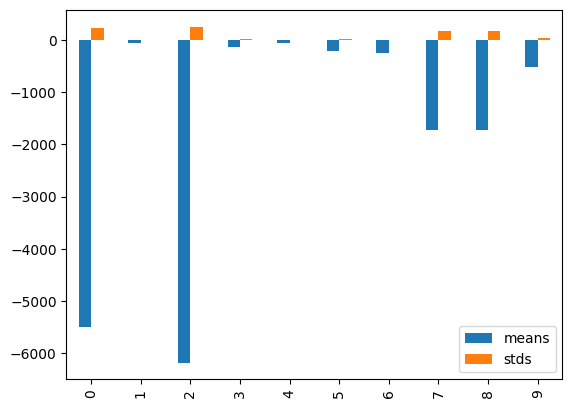

In [160]:
df_all = pd.DataFrame(data=all_data)
df_all.plot.bar()

<AxesSubplot:>

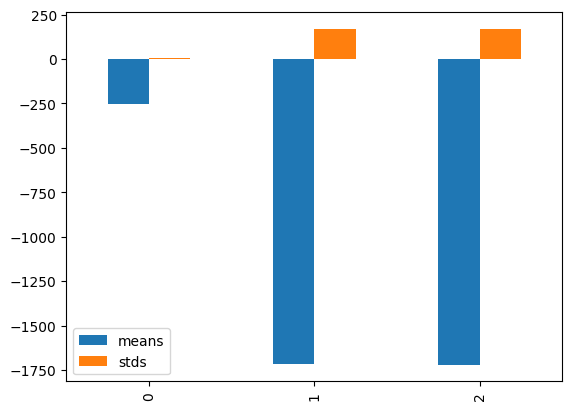

In [161]:
df_linear = pd.DataFrame(data=data_linear)
df_linear.plot.bar()

<AxesSubplot:>

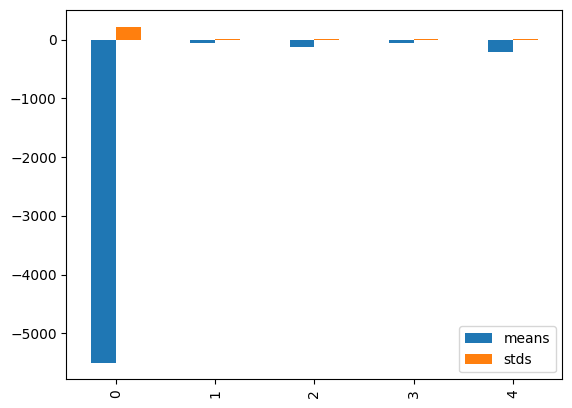

In [162]:
df_rbf = pd.DataFrame(data=data_rbf)
df_rbf.plot.bar()

<AxesSubplot:>

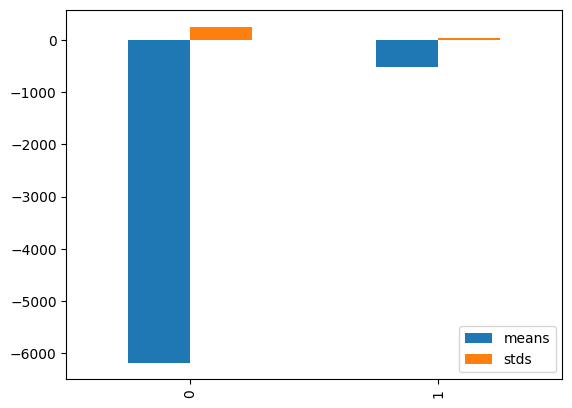

In [163]:
df_poly = pd.DataFrame(data=data_poly)
df_poly.plot.bar()

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

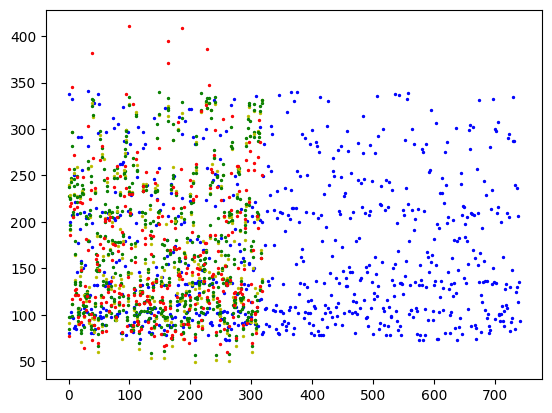

In [164]:
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)
plt.scatter(np.arange(len(Y_train)),Y_train, edgecolors='b', s=2)
plt.scatter(np.arange(len(Y_test)),Y_test, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear, edgecolors='y', s=2)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='r', s=2)
plt.show()